In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
#loading the data
df = pd.read_csv('HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Checking Missing values

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Perfect!!, we do not have any missing values in our data set.

# Checking for inputs which should be removed

In [5]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [6]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [7]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [8]:
df['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [9]:
df.shape

(1470, 35)

Here I will be removing 2 columns EmployeeCount and EmployeeNumber, as they are not affecting the change in the number of Attrition, they are just used to refer an employee uniquely and also removing Standard hours, Over18, because there is no variance in these columns, 80 hrs are fixed value for all the employees, and all employees are Over18 so it will have null effect on our model.

In [10]:
data = df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1)

In [11]:
data.shape

(1470, 31)

# statistical summary of our data

In [12]:
#statistical summary of our data

data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


All seems uniformly disributed except Monthly income and Monthly rate, as there is a huge diff between 75% quantile and max value, there might be possbilities that there are some outliers.

In [14]:
#I will be creating a copy of data set, where all the features will be in numeric format, will be doing Label encoding

data_copy = data.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
data_copy['Attrition'].dtypes

dtype('O')

In [18]:
for col in data_copy.columns:
    if data_copy[col].dtypes == 'O':   #here O means object type
        data_copy[col] = le.fit_transform(data_copy[col])

In [19]:
data_copy = pd.DataFrame(data_copy)

In [20]:
data_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [21]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

In [22]:
#we have converted all the features into int format,now it will be easy for us to do the visualisation.

# Univariate Analysis

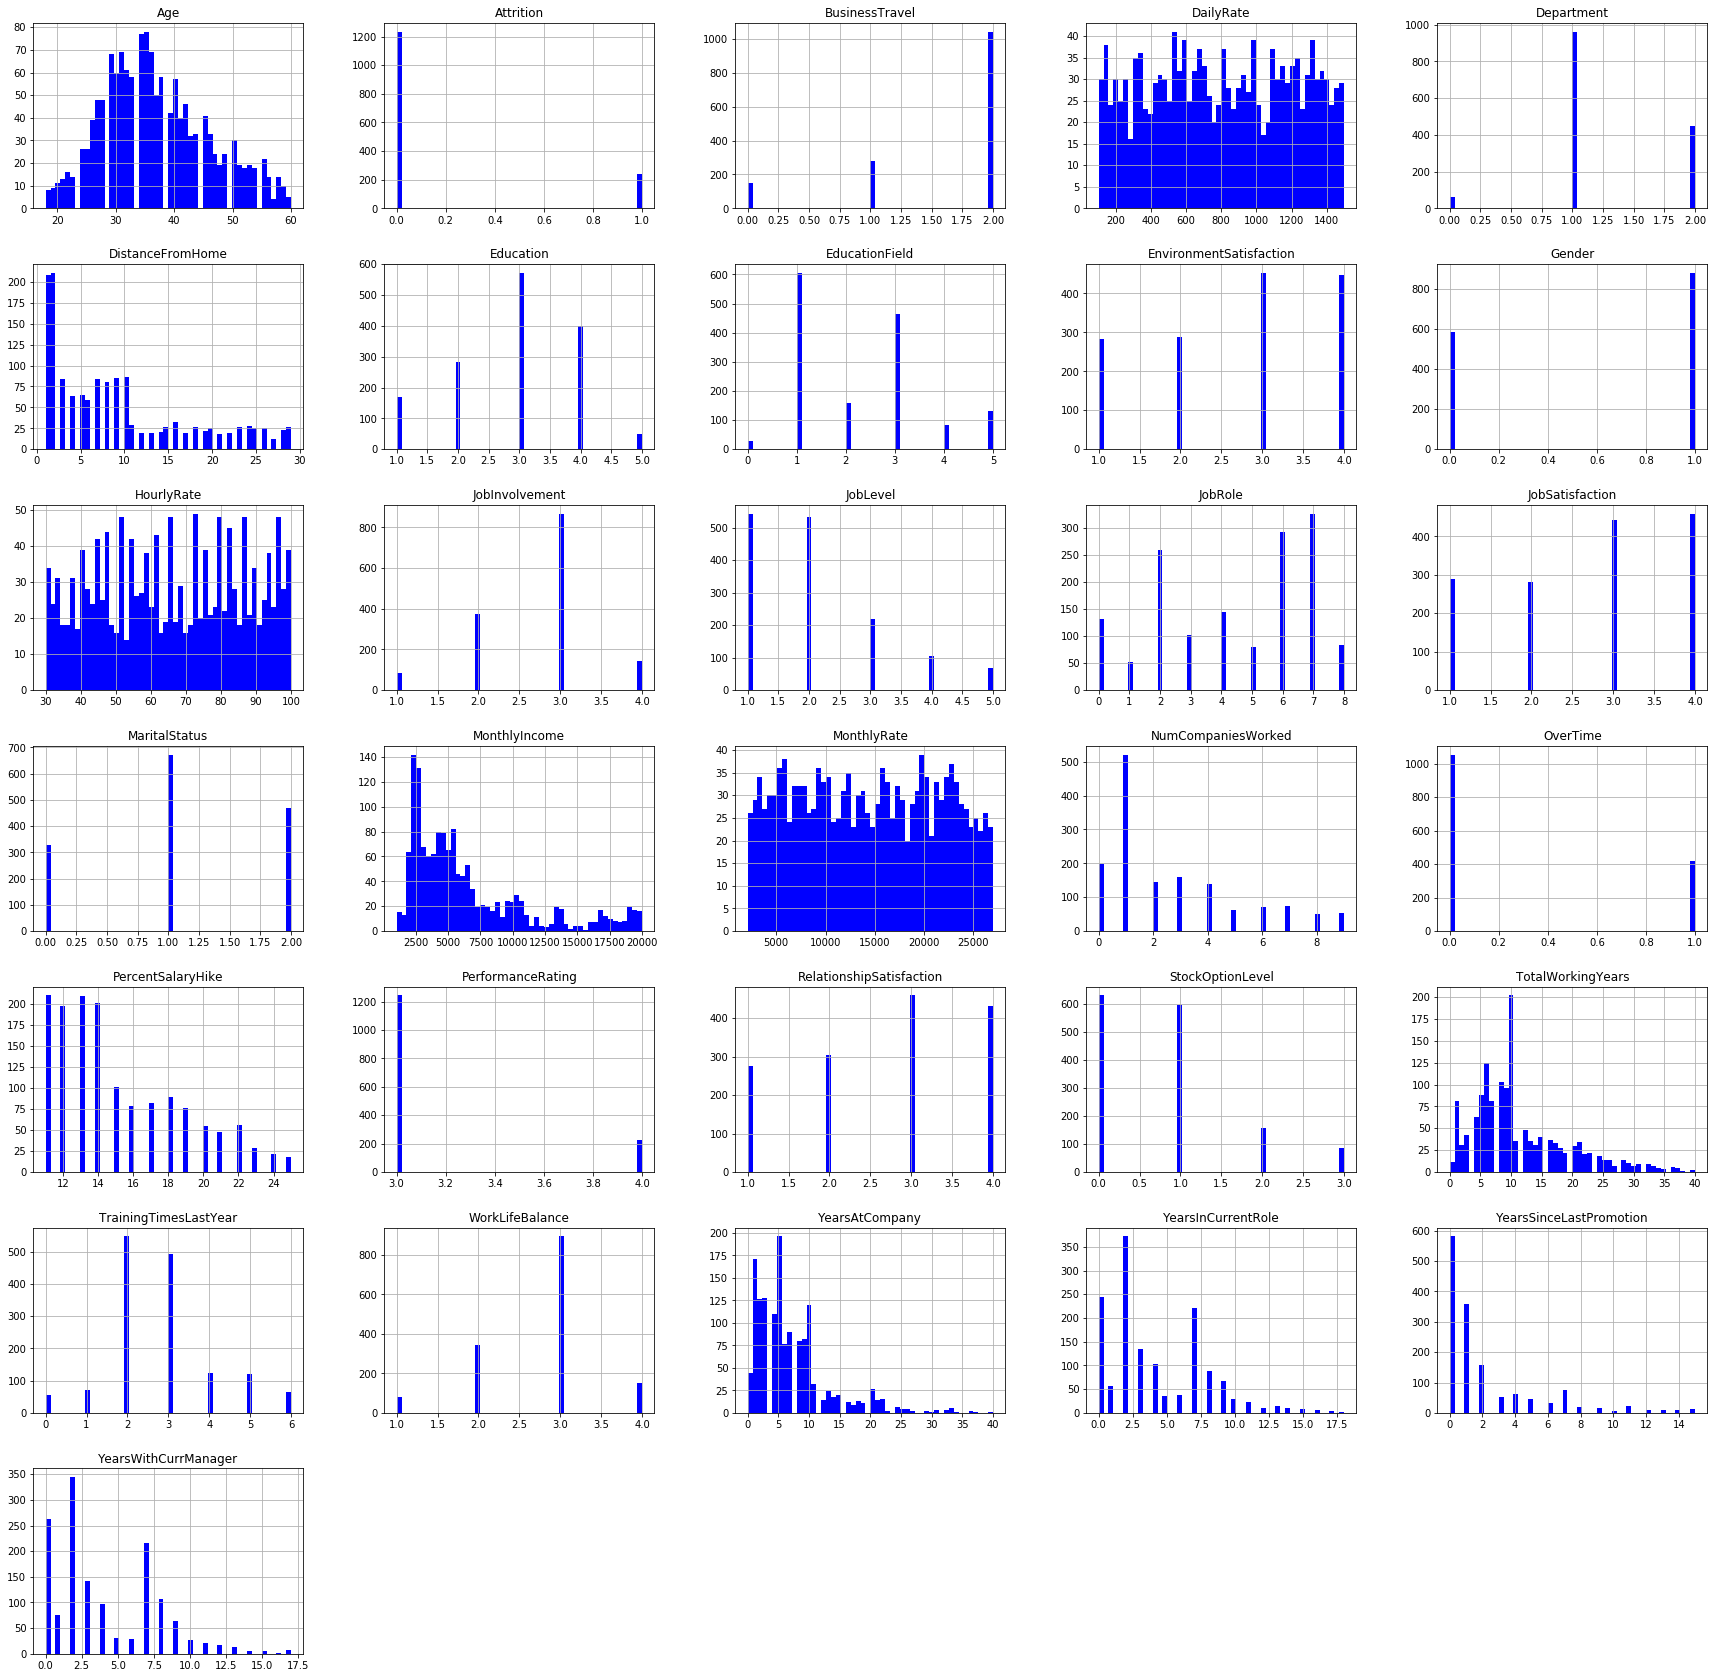

In [23]:
#creating histogram to check the distribution of every columns 
data_copy.hist(bins = 50, figsize=(30,30), color = 'blue',layout=(7,5),);


1 - AGE:
    In the Age column, we can see that most of the work force in a company is aged from 29 years to 38 years apx.
    Minumum age of an employee is 18 years(however he is 18+ as we had a column which mentioned if an employee is Over18
    for every employee it was true) and the maximum age of an employee is 60 years.
    As the age of an employee increases after a limit the workforce dimnishes, there could be many reason for that like Retirement, 
    Health Issues etc.
    
2 - Attrition:
    Here we can see that the number of employees leaving the company is lower. We will be analysing later the reason of
    Attrition.
    Attrotion 0 = No , Attrition 1 = Yes
    
3 - Business Travel:
    This refers if an employee has to travel related to work, this is categorised in 3 parts.
    0 = Non-Travel
    1 = Travel-Frequently
    2 = Travel-Rarely
    we can confirm that the employee who are traveling Rarely are more likely to stay in a company, which is obvious as if  one has to 
    travel alot for work, it will make any indivisual frustrated, unless traveling is not related work but for holiday.
    
4 - Daily Rates:
    A Daily rate is the billing cost for an individual's services for a single day. It is sometimes called a per diem.
    Daily rate is almost uniformaly distributed.
    
5 - Department:
    On Department there are 3 categories.
    0 - Human Resource
    1 - Research and Development
    2 - Sales
    From the graph, we can see that employee are more likely to work under Research and Development Department
    in a company. In Human Resource there is low worforce, as the rule-of-thumb ratio is 1.4 full-time HR staff per 100 employees. 
    source = https://axioshr.com/how-many-hr-people-do-you-need/
        
6 - Distance From Home:
    here we can see that for more employees are working in a company if the distance from their home to company is with in 0-3 km.
    Which is obvious, any person would like to work near his/her home/stay.
    when the Distance reaches > 10 kms, we can see that there are few employee working in a company.
    
7 - Education:
    This refers to the level of Education an employee has who is working in a company.
    It is ranging from 1 - 5, from Entry level to higher Education like Phd.
    we can see that the employees between 2-4 are more likely to work in a company.
    
8 - Education Field:
    There are 6 fields in which an employee is specialised.
    from the above Graph we can see that employee with Education in the field of Life Science and Medical are more.
    Minimum in Human resources.
    
9 - Environmetal Satisfaction:
    with more / better Environmental Satisfaction, people is more likely to remain/work in the company
    On level 3 and 4 we can see that the number of employees are more.
    
10 - Gender:
    Number of males are working are more than Females.
    
11 - HourlyRate:
    An hourly rate is the amount of money that an employee receive for each hour they spend working.
    we can see that there is almost normal distribution here among all the employees.
    
12 - Job Involvment:
    This refers to an employee involment towards an organization to fulfill its mission 
    and meet its objectives by applying their own ideas, expertise, and efforts 
    towards solving problems and making decisions. We can see a significant rise upto level 3
    and then a drastic drop at level 4, which is understood as if there are more work load exceeding a limit
    then it could be possible that an indivisual try to quit.
    
13 - Job Level:
    this refers to the position/post od an indivisual in a company.
    From level 1-2, it seems these are associate,lower level emplyees that is why the count is more, as the Job role increases
    the number of employees in that particular Job role decreases, for ex Manager, CFO, CEO. 
    Salary level also Varies due to these Level.
    
14 - Job Role:
    More Employees are working under Sales Executive, Research Scientist and Laboratory Scientist
    
15 - Job Satisfaction:
    more the satisfaction more the number of employees, It shows a positive Linear Relation.
    
16 - Marital Status:
    here 0 = Divorced, 1 = Married and 2 = Single.
    There are more number of employees whose Marital status is married. 
    
17 - Mothly Income:
    There are more frequency between 0-8000, after 8000 the frequency or counts of the employee dimnishes as 
    that Higher level of employees like Manager, CFO etc are the one who will get high pay.
    
18 - Monthly Rate:
    here again there is almost normal distribution on average.
    
19 - Number of Companies worked:
    here we can see that an freshers are less, Any company will hire an employee who is havingany past exp. But as the 
    experience level increases the number employee decreases, this could be because with a lot of experience any employee will 
    be willing to switch for a better  high rank. And we know that there are only few employees needed for that rank.
    
20 - Overtime:
    No. of employees doing overtime are less.
    
21 - Percentage Salary Hike:
    this is again depends upon the Salary of associate level and Entry level. We can see that there is a right tail skewness.
    most of the employees gets hike from 11 - 14 %.
    
22 - Performance Rating:
    Scoring High rating in any company is not an easy task. Employees Salary Hike, appraisal all depends upon the Performance       rating. That is why there are less employee who gets Rating of 4 and above.
    
23 - Relationship Satisfaction:
    we see a positive linear trend here. More the satisfaction level, more number of employees.
    
24 - Stock option:
    Here we can see that the more stock options are given to less people, generally to upper managment employees.
    
25 - Total working years:
    frequency of emplyees are more when the total working years are 10, it shows a right skewness.
    
26 - Training Time Last year:
    Most employees took 2-3 trainings.

27 - Work life Balance:
    when the work lofe balance level is 3, employee count is at maximum.
    
28 - Years at Company
    here we can see that from 1-10 years, employee count is more. There is a right skewness.
    
29 - Years in current role:
    most of the employees spend 2 years in their current role.
    
30 - Year since Last promotion:
    Here we can see that as the years in last promotion increases the employee count decreases.
    
31 - Years with current Manager:
    Same here, Negative Linear relation, Right side skewness.
    
    

    
    

# Bivariate Analysis

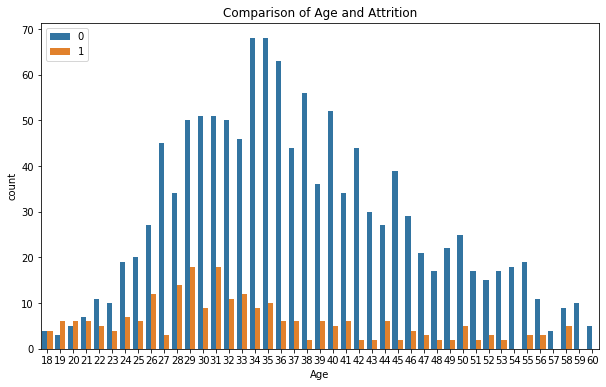

In [24]:
#relation of age with Attrition
plt.figure(figsize=(10,6))
sns.countplot(x='Age',hue='Attrition',data=data_copy)
plt.title('Comparison of Age and Attrition')
plt.legend()
plt.show()

Here we can see that the attrition is maximum between the age groups 26-33.
At a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21.

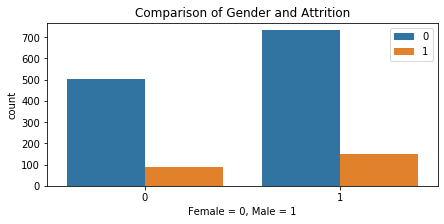

In [25]:
#relation of Gender with Attrition
plt.figure(figsize=(7,3))
sns.countplot(x='Gender',hue='Attrition',data=data_copy)
plt.title('Comparison of Gender and Attrition')
plt.xlabel('Female = 0, Male = 1')
plt.legend()
plt.show()

Here we can see that the Attrition count is more in case of Male, however this is not justified as we had a data in which Male are more,not a good approach(Gender Biasness) however I am just trying to show the numbers here.

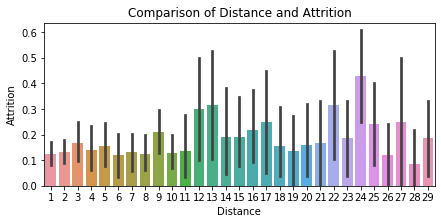

In [26]:
#relation of Distance from Home with Attrition
plt.figure(figsize=(7,3))
sns.barplot(x='DistanceFromHome',y='Attrition',data=data_copy)
plt.title('Comparison of Distance and Attrition')
plt.xlabel('Distance')
plt.show()

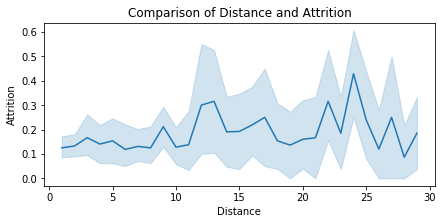

In [27]:
#relation of Distance from Home with Attrition
plt.figure(figsize=(7,3))
sns.lineplot(x='DistanceFromHome',y='Attrition',data=data_copy)
plt.title('Comparison of Distance and Attrition')
plt.xlabel('Distance')
plt.show()

Here we can see that as the distance from home increases the Attrition rate increases, their is a positive Linear relation between these two.

In [28]:
#relation of Attrition with Business Travel
Buss_trv = data_copy.groupby(['BusinessTravel','Attrition'])['BusinessTravel'].count().reset_index(name='Counts')
Buss_trv

,BusinessTravel,Attrition,Counts
0,0,0,138
1,0,1,12
2,1,0,208
3,1,1,69
4,2,0,887
5,2,1,156


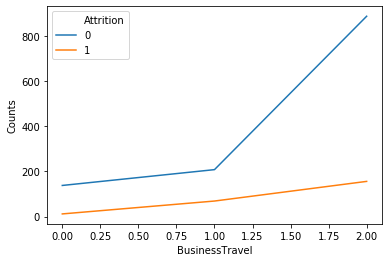

In [29]:
sns.lineplot(x='BusinessTravel',y='Counts',hue='Attrition',data=Buss_trv)

Here we can see that the  rate of Attrition is high when there is more travelling.
at 1 the attrition rate is highest 25% approx.

In [30]:
#we have Hourly Rate, Monthly Rate and Mnthly Income with continous value. For plotting and better Visualisation, we will be 
#creating seperate df grouped by each feature and make round off values for easily distribution of the above feature.

month_rate= data_copy.groupby(['MonthlyRate','Attrition'])['MonthlyRate'].count().reset_index(name='Counts')

In [31]:
#rounding off the monthly rate values to 3 decimal values.
month_rate['MonthlyRate']=round(month_rate['MonthlyRate'],-3)

In [32]:
month_rate.head()

,MonthlyRate,Attrition,Counts
0,2000,0,1
1,2000,0,1
2,2000,0,1
3,2000,0,1
4,2000,0,1


In [33]:
month_rate['MonthlyRate'].unique()

array([ 2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000, 10000,
       11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000,
       20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000],
      dtype=int64)

In [34]:
#now again we will groupby the month_rate data by MonthlyRate, we will be having categorical income distribution as shown above.
#and then it will be easy for us to plot the relation.
month_rate= month_rate.groupby(['MonthlyRate','Attrition'])['MonthlyRate'].count().reset_index(name='Counts')

In [35]:
month_rate.head()

,MonthlyRate,Attrition,Counts
0,2000,0,18
1,2000,1,4
2,3000,0,48
3,3000,1,13
4,4000,0,51


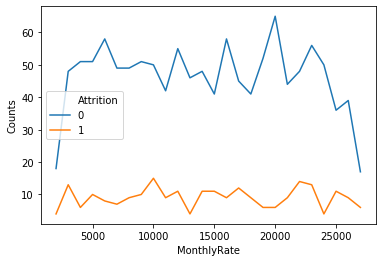

In [36]:
sns.lineplot(x='MonthlyRate',y='Counts',hue='Attrition',data=month_rate)

we can see that when the monthly_rate is around 2500 the attrition rate was increasing, at 10000 it was at maximum. 
at 13000 it was reduced. With the above graph, it is hard to show any patter as it seems uniformly distributed.

I think we will get the same results with Hourly Rate, lets check it out.

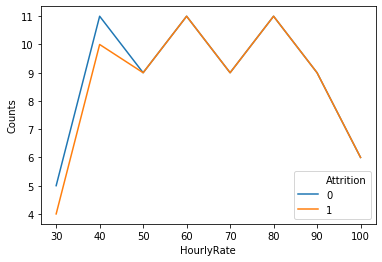

In [37]:
Hourly_rt= data_copy.groupby(['HourlyRate','Attrition'])['HourlyRate'].count().reset_index(name='Counts')
Hourly_rt['HourlyRate']=round(Hourly_rt['HourlyRate'],-1)
Hourly_rt= Hourly_rt.groupby(['HourlyRate','Attrition'])['HourlyRate'].count().reset_index(name='Counts')
sns.lineplot(x='HourlyRate',y='Counts',hue='Attrition',data=Hourly_rt)

As expected, there is not much relation with Hourly Rate and Monthly Rate with Attrition.

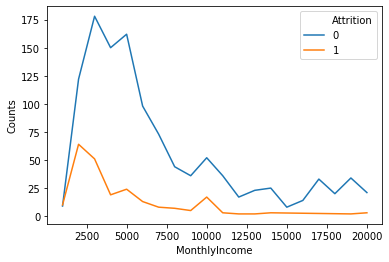

In [38]:
#checking the relation of monthly income and Attrition.
Month_inc= data_copy.groupby(['MonthlyIncome','Attrition'])['MonthlyIncome'].count().reset_index(name='Counts')
Month_inc['MonthlyIncome']=round(Month_inc['MonthlyIncome'],-3)
Month_inc= Month_inc.groupby(['MonthlyIncome','Attrition'])['MonthlyIncome'].count().reset_index(name='Counts')
sns.lineplot(x='MonthlyIncome',y='Counts',hue='Attrition',data=Month_inc)

Here we can see a good relation of Monthly Income and Attrition counts. We can see when the income level was around 2500 (from starting) the are more Attrition, this could because the employee are looking for more better opportunities in the starting.
And then again at 10000 there is a spike, that might be because the economic expectation of employee rises and he desire for a better Pay and shifts to another company. When an employee gets good pay he tends to remain in the company as shown in the graph.

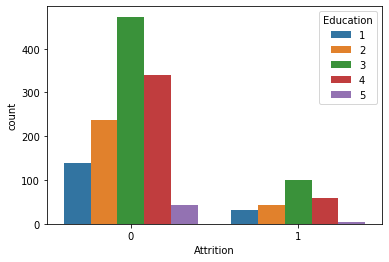

In [39]:
#checking relation of Education with Attrition.
sns.countplot(x='Attrition',hue='Education',data=data_copy)

From the above graph we can see that at edu level 1 the rate of attrition is highest whish is 18.23% (That I have calculatd seprately by grouping Education and Attrition, and at edu level 5 the rate of Attrition is minimum at 10.41%)

In [40]:
#relation of EnvironmentSatisfaction and Attrition.
Env_sat = data_copy.groupby(['EnvironmentSatisfaction','Attrition'])['EnvironmentSatisfaction'].count().reset_index(name='Counts')
Env_sat

,EnvironmentSatisfaction,Attrition,Counts
0,1,0,212
1,1,1,72
2,2,0,244
3,2,1,43
4,3,0,391
5,3,1,62
6,4,0,386
7,4,1,60


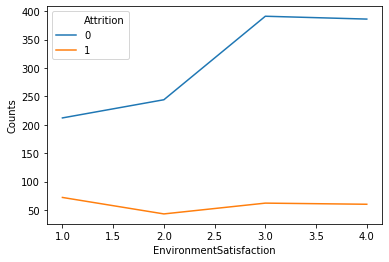

In [41]:
sns.lineplot(x='EnvironmentSatisfaction',y='Counts',hue='Attrition',data=Env_sat)

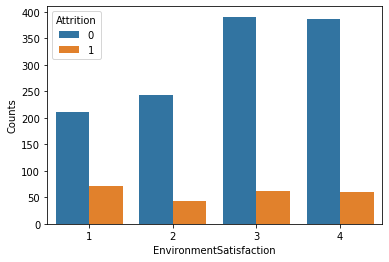

In [42]:
sns.barplot(x='EnvironmentSatisfaction',y='Counts',hue='Attrition',data=Env_sat)

From the above graph it can  be seen that at the initial phase the employment there is more rate of Attrition,at 1 level the attrition rate is 25.35% highest from all other levels. 
A new employee takes time to keep up with the office Environment, From 2 to 3 we see that there is an increase at attrition rate, the reason could be if an employee is shifted to a new process or work place.

In [43]:
data_copy.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [44]:
#creating a seperate groupedby df for all categories variable then I will create a subplots for each one and 
#find the onservation.

Job_inv = data_copy.groupby(['JobInvolvement','Attrition'])['JobInvolvement'].count().reset_index(name='Counts')
Job_lev = data_copy.groupby(['JobLevel','Attrition'])['JobLevel'].count().reset_index(name='Counts')
Job_sat = data_copy.groupby(['JobSatisfaction','Attrition'])['JobSatisfaction'].count().reset_index(name='Counts')
Num_com_wrk = data_copy.groupby(['NumCompaniesWorked','Attrition'])['NumCompaniesWorked'].count().reset_index(name='Counts')
Sal_hike = data_copy.groupby(['PercentSalaryHike','Attrition'])['PercentSalaryHike'].count().reset_index(name='Counts')
Perf_rating = data_copy.groupby(['PerformanceRating','Attrition'])['PerformanceRating'].count().reset_index(name='Counts')
Rel_sat = data_copy.groupby(['RelationshipSatisfaction','Attrition'])['RelationshipSatisfaction'].count().reset_index(name='Counts')
Stk_lev = data_copy.groupby(['StockOptionLevel','Attrition'])['StockOptionLevel'].count().reset_index(name='Counts')
Tot_work_year = data_copy.groupby(['TotalWorkingYears','Attrition'])['TotalWorkingYears'].count().reset_index(name='Counts')
Training = data_copy.groupby(['TrainingTimesLastYear','Attrition'])['TrainingTimesLastYear'].count().reset_index(name='Counts')
Work_life = data_copy.groupby(['WorkLifeBalance','Attrition'])['WorkLifeBalance'].count().reset_index(name='Counts')
Years_comp = data_copy.groupby(['YearsAtCompany','Attrition'])['YearsAtCompany'].count().reset_index(name='Counts')
Years_curr_role = data_copy.groupby(['YearsInCurrentRole','Attrition'])['YearsInCurrentRole'].count().reset_index(name='Counts')
Last_prom = data_copy.groupby(['YearsSinceLastPromotion','Attrition'])['YearsSinceLastPromotion'].count().reset_index(name='Counts')
Manager = data_copy.groupby(['YearsWithCurrManager','Attrition'])['YearsWithCurrManager'].count().reset_index(name='Counts')

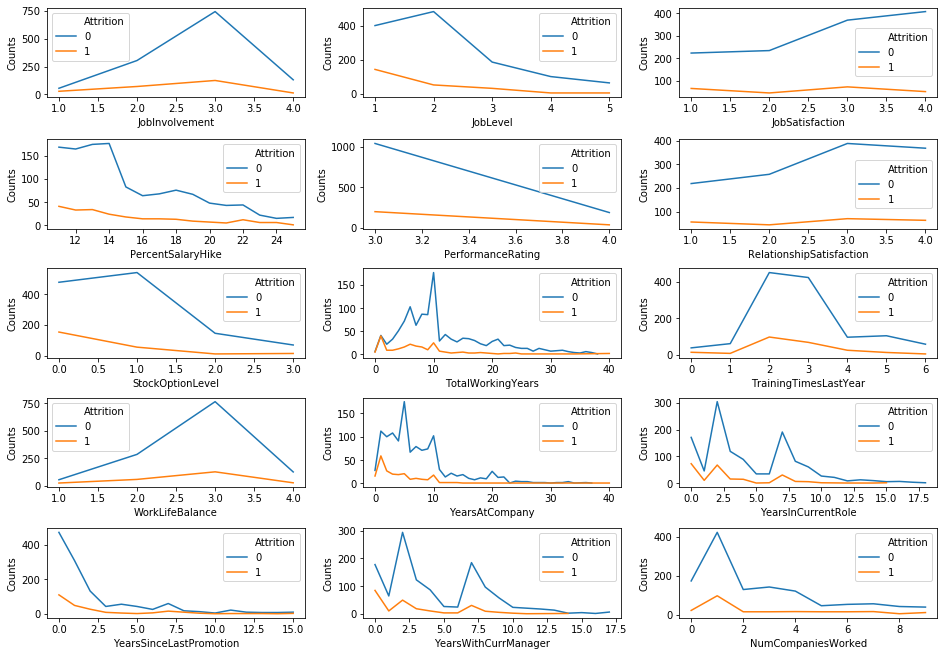

In [45]:
#creating a subplot for all of the above.

fig, axes = plt.subplots(nrows=5, ncols=3,constrained_layout=True,figsize=(13,9))
sns.lineplot(x='JobInvolvement',y='Counts',hue='Attrition',data=Job_inv,ax=axes[0,0])
sns.lineplot(x='JobLevel',y='Counts',hue='Attrition',data=Job_lev,ax=axes[0,1])
sns.lineplot(x='JobSatisfaction',y='Counts',hue='Attrition',data=Job_sat,ax=axes[0,2])
sns.lineplot(x='PercentSalaryHike',y='Counts',hue='Attrition',data=Sal_hike,ax=axes[1,0])
sns.lineplot(x='PerformanceRating',y='Counts',hue='Attrition',data=Perf_rating,ax=axes[1,1])
sns.lineplot(x='RelationshipSatisfaction',y='Counts',hue='Attrition',data=Rel_sat,ax=axes[1,2])
sns.lineplot(x='StockOptionLevel',y='Counts',hue='Attrition',data=Stk_lev,ax=axes[2,0])
sns.lineplot(x='TotalWorkingYears',y='Counts',hue='Attrition',data=Tot_work_year,ax=axes[2,1])
sns.lineplot(x='TrainingTimesLastYear',y='Counts',hue='Attrition',data=Training,ax=axes[2,2])
sns.lineplot(x='WorkLifeBalance',y='Counts',hue='Attrition',data=Work_life,ax=axes[3,0])
sns.lineplot(x='YearsAtCompany',y='Counts',hue='Attrition',data=Years_comp,ax=axes[3,1])
sns.lineplot(x='YearsInCurrentRole',y='Counts',hue='Attrition',data=Years_curr_role,ax=axes[3,2])
sns.lineplot(x='YearsSinceLastPromotion',y='Counts',hue='Attrition',data=Last_prom,ax=axes[4,0])
sns.lineplot(x='YearsWithCurrManager',y='Counts',hue='Attrition',data=Manager,ax=axes[4,1])
sns.lineplot(x='NumCompaniesWorked',y='Counts',hue='Attrition',data=Num_com_wrk,ax=axes[4,2])

plt.show()

From above plots we can see that Job Level, Performance rating, Stock Option, Percentage on Salary hike, Years at company,
Years with current Manager, Years in Current role, Total working Years, Years since Last promotion is negative related with Attrition. We can see that intitally when the level of above features is low then there is high rate of attrition, and some sometimes in the middle phase there is spike in Attrition but then again decreases.


Initially, people get adjusted with their normal work life balance, but later at some level the expect for more and then Attrition comes. But when the work life balance is at its best then the attrition rate decreases.

With having more experience in work, people tends to remain in the company. The initial phase is the one where there is a increase in the rate of Attrition.This can be seen in NumCompaniesworked graph (Last one).



# OUTLIER DETECTION/REMOVAL

In [46]:
#using zscore test for detecting outliers
from scipy.stats import zscore
z = np.abs(zscore(data_copy))

In [47]:
threshold = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [48]:
data_after_outliers = data_copy[(z<3).all(axis = 1)]
print('observations after removing outliers :',data_after_outliers.shape)
print('observations before removing outliers :', data_copy.shape)

observations after removing outliers : (1387, 31)
observations before removing outliers : (1470, 31)


# CORRELATION MATRIX

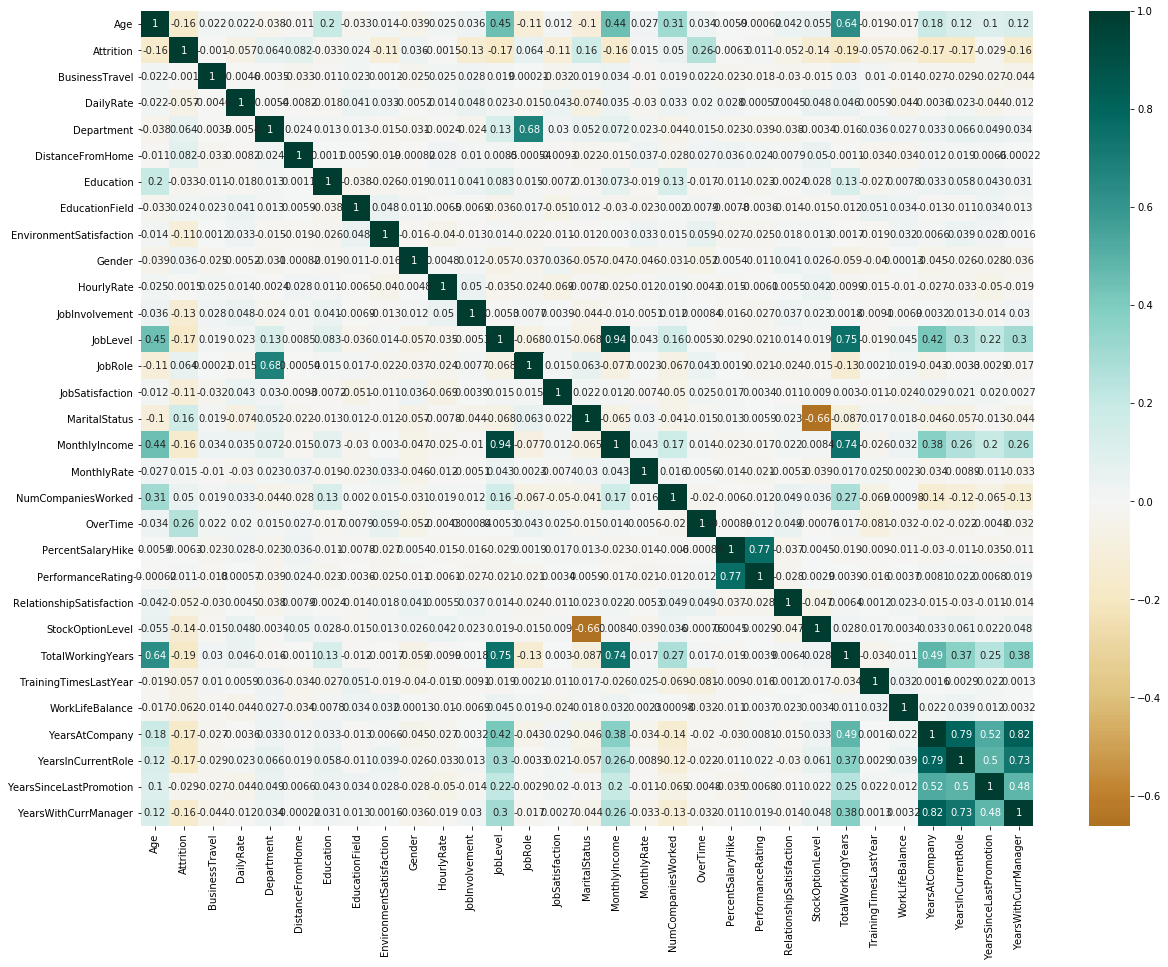

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(data_after_outliers.corr(),annot=True,cmap='BrBG',center=0)
plt.show()

I see that Joblevel and Monthly Income are very Highly correlated at 0.94, I will remove  monthly income for my model building data set from input variable, as With Job level there is more accurate and negative linear relation with Arrition.

some of the Independent features (basically which includes long duration(yearly)) are positively correlated to each other.

# Splitting into inputs and Target

In [50]:
#removing the below features, as there is very less correlation of the below features with the target Variable
X = data_after_outliers.drop(['MonthlyIncome','Attrition','BusinessTravel','Gender','EducationField','HourlyRate'],axis=1) 
X.head()

,Age,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,2,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,1,8,1,3,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,4,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,1,2,1,1,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [51]:
y = data_after_outliers['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [52]:
#checking skewness of inputs
X.skew()

Age                         0.472280
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [53]:
#lets use log1p scaler to reduce skewness

for col in X.columns:
    if X[col].skew()>0.55:
        X[col]=np.log1p(X[col])

In [54]:
X.skew()

Age                         0.472280
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.031570
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
JobInvolvement             -0.501401
JobLevel                    0.497167
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
OverTime                    0.954751
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
YearsAtCompany             -0.379527
YearsInCurrentRole         -0.390406
YearsSinceLastPromotion     0.695348
YearsWithCurrManager       -0.347018
dtype: float64

# Importing Models and Libraries

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

# CROSS VALIDATION TEST

In [56]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
         GaussianNB()]

for model in models:
    print("model name =",model)
    model.scores = cross_val_score(model, X, y, cv=10)
    print('Model scores :',model.scores)
    print('Model mean score: ',model.scores.mean())
    print('Model std score :', model.scores.std())
    print('\n')
    

model name = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Model scores : [0.84892086 0.83453237 0.83453237 0.8705036  0.87769784 0.83453237
 0.84172662 0.83333333 0.83333333 0.89130435]
Model mean score:  0.8500417057658222
Model std score : 0.02058278642307848


model name = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Model scores : [0.83453237 0.83453237 0.83453237 0.83453237 0.83453237 0.83453237
 0.83453237 0.83333333 0.83333333 0.84057971]
Model mean score:  0.8348972995516629
Model std score : 0.001952

From the above Cross Validation test , we got a score of 85.72 with random forest classifier. I will be buliding my model using that only

In [57]:
max_rfr_score = 0
for r_state in range(41,100):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.33,random_state=r_state)
    rfr = RandomForestClassifier()
    rfr.fit(X_train,y_train)
    rfr_pred = rfr.predict(X_test)
    Accuracy = accuracy_score(y_test,rfr_pred)
    if Accuracy>max_rfr_score:
        max_rfr_score=Accuracy
        final_r_state = r_state
        
print('max Accuracy score for the given ','', final_r_state, 'is', max_rfr_score)

max Accuracy score for the given   99 is 0.8755458515283843


Great, here we have got an accuracy score of 87.55%, lets also use Gridsearch CV for parameter Tuning

In [58]:
#giving the parameter grid for gridsearchCV for Logistic Regression
param_grid = {'ccp_alpha': [0.001, 0.01, 0.1, 1, 10],'criterion': ['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'] }
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid)
grid_search.fit(X, y)
grid_search.best_params_

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'sqrt'}

In [59]:
#creating my final model now.

rfc = RandomForestClassifier(criterion='gini',max_features='log2',ccp_alpha=0.001)


In [60]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.33,random_state=86)

In [61]:
rfc_model = rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
Accuracy = accuracy_score(y_test,rfc_pred)

In [62]:
print('Accuracy score :', Accuracy)

Accuracy score : 0.8427947598253275


In [63]:
confusion_matrix(y_test,rfc_pred)

array([[376,   5],
       [ 67,  10]], dtype=int64)

In [64]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       381
           1       0.67      0.13      0.22        77

    accuracy                           0.84       458
   macro avg       0.76      0.56      0.57       458
weighted avg       0.82      0.84      0.80       458



In [65]:
rfc.feature_importances_

array([0.07926654, 0.07179   , 0.02244546, 0.05426645, 0.02644931,
       0.03432748, 0.03274069, 0.03086042, 0.03917314, 0.04083728,
       0.02527062, 0.06245767, 0.04530311, 0.06926029, 0.04734171,
       0.0062083 , 0.02716982, 0.03107591, 0.05897543, 0.03008743,
       0.02891528, 0.04983687, 0.0268568 , 0.02677362, 0.03231037])

# AUC ROC curve 

In [66]:
from sklearn.metrics import roc_auc_score,roc_curve

In [67]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]

In [68]:
#fpr = false positive rate
#tpr = true positive rate
#thresholds we set

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

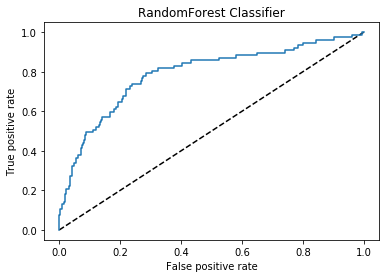

In [69]:
#plotting AUC ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'RandomForest Classfier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForest Classifier')
plt.show()

In [70]:
#will try to build a model with dummy sets of Categorical variables.

In [71]:
data_dummies=pd.get_dummies(data)

In [72]:
data_dummies.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [73]:
X_new = data_dummies.drop(['MonthlyIncome','Attrition_No','Attrition_Yes','Gender_Female','Gender_Male','HourlyRate'],axis=1) 
X_new.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,3,2,4,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,2,2,2,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,2,1,3,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,3,1,3,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,3,1,2,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [74]:
y_new = data_dummies['Attrition_Yes']
y_new.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition_Yes, dtype: uint8

In [75]:
#will do standard scaling on X_new data set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new = sc.fit_transform(X_new)
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,0.379672,-0.057788,1.153254,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,-0.3371,-0.481859,0.639841,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-1.026167,-0.057788,-0.660853,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,-1.026167,-0.961486,0.246200,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,0.379672,-0.961486,0.246200,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,0.379672,-0.961486,-0.660853,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241


In [76]:
#now checking the cross val score on our new data set X_new


In [77]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
         GaussianNB()]

for model_new in models:
    print("model name =",model_new)
    model_new.scores = cross_val_score(model_new, X_new, y_new, cv=10)
    print('Model scores :',model_new.scores)
    print('Model mean score: ',model_new.scores.mean())
    print('Model std score :', model_new.scores.std())
    print('\n')
    

model name = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Model scores : [0.91156463 0.8707483  0.85714286 0.8707483  0.8707483  0.85034014
 0.88435374 0.88435374 0.9047619  0.89115646]
Model mean score:  0.8795918367346939
Model std score : 0.018517901481382604


model name = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Model scores : [0.89115646 0.85034014 0.85034014 0.85714286 0.87755102 0.85714286
 0.85714286 0.88435374 0.86394558 0.85714286]
Model mean score:  0.8646258503401361
Model std score : 0.01375

In [78]:
#our best pick would be Logistic Regression here.
#building a logistic regression model and checking for best random state for best accuracy score.
max_lr_score = 0
for r_state in range(41,100):
    X_train,X_test,y_train,y_test= train_test_split(X_new,y_new,test_size=.33,random_state=r_state)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    lr_pred = lr.predict(X_test)
    Accuracy = accuracy_score(y_test,lr_pred)
    if Accuracy>max_lr_score:
        max_lr_score=Accuracy
        final_r_state = r_state
        
print('max Accuracy score for the given ','', final_r_state, 'is', max_lr_score)

max Accuracy score for the given   64 is 0.9053497942386831


In [79]:
#giving the parameter grid for gridsearchCV for Logistic Regression
new_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100],'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] }
new_grid_search = GridSearchCV(estimator = lr, param_grid = new_param_grid)
new_grid_search.fit(X_new, y_new)
new_grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [80]:
#creating final model .
X_train,X_test,y_train,y_test= train_test_split(X_new,y_new,test_size=.33,random_state=64)


In [81]:
lr_new = LogisticRegression(C = 0.01, penalty = 'l2', solver= 'liblinear')
lr_model = lr_new.fit(X_train,y_train)
lr_new_pred = lr_new.predict(X_test)
lr_Accuracy = accuracy_score(y_test,lr_new_pred)

In [82]:
print('Accuracy score :', lr_Accuracy)

Accuracy score : 0.8909465020576132


In [83]:
print('confusion metrix :', '\n', confusion_matrix(y_test,lr_new_pred))

confusion metrix : 
 [[398  11]
 [ 42  35]]


In [84]:
print('classfication report:', '\n', classification_report(y_test,lr_new_pred))

classfication report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       409
           1       0.76      0.45      0.57        77

    accuracy                           0.89       486
   macro avg       0.83      0.71      0.75       486
weighted avg       0.88      0.89      0.88       486



In [85]:
#Saving the model


#saving the model
from sklearn.externals import joblib
joblib.dump(lr_new_pred,'HRAnalytics.pkl')

['HRAnalytics.pkl']